In [1]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [2]:
%run 'cross_validation/functions.ipynb'

In [3]:
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_syn, labels_syn, 8)

In [4]:
hyperparameters = {'n_estimators': 100, 'max_depth': 12, 'max_features': 'sqrt'}

In [5]:
predict_cruise(hyperparameters, 'syn')

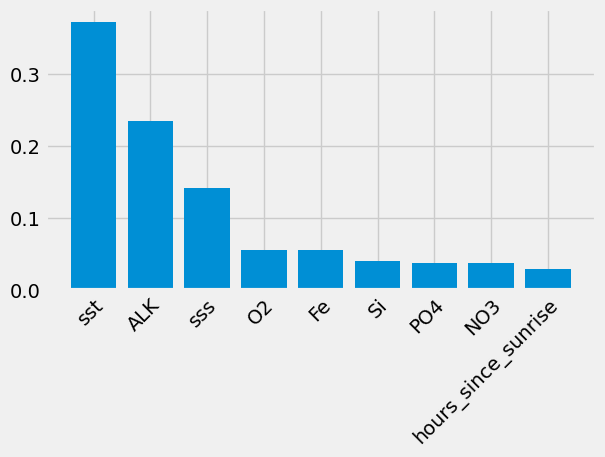

In [6]:
feature_importance('syn',feature_list_syn)

[ 0.00668742  0.00091427  0.00158494 -0.00058623  0.00035262  0.00032072
 -0.01264158 -0.00204807  0.00117535]
[ 0.13415019  0.03228622 -0.01349638  0.00246633 -0.01082043 -0.08722058
 -0.02683138 -0.00995598 -0.00405746]
[ 0.2721936  -0.13478426  1.07745279  0.10047596  0.05301316 -0.08882297
  0.01556488  0.06754729  0.02082216]
[ 0.08250837 -0.04508702  0.01116314  0.28838735 -0.00797729 -0.01065163
  0.01993861  0.01483102  0.00346553]
[ 0.05432753 -0.05182669 -0.01262007  0.05880198  0.05367987  0.047798
  0.0325439   0.00159377 -0.00305374]
[ 3.44861081e-03  3.35265514e-03  2.79331862e-03  7.94901058e-04
  5.60203233e-03  5.41803131e-03  2.25929601e-03 -2.02241475e-03
 -8.14171120e-05]
[0.00328277 0.00320796 0.00256166 0.01253203 0.04991699 0.03095296
 0.01489236 0.00064933 0.00055602]
[ 0.38688655  0.2396607   0.35176577 -0.02247532 -0.02918796 -0.01314797
 -0.03059664 -0.03008223  0.00307172]


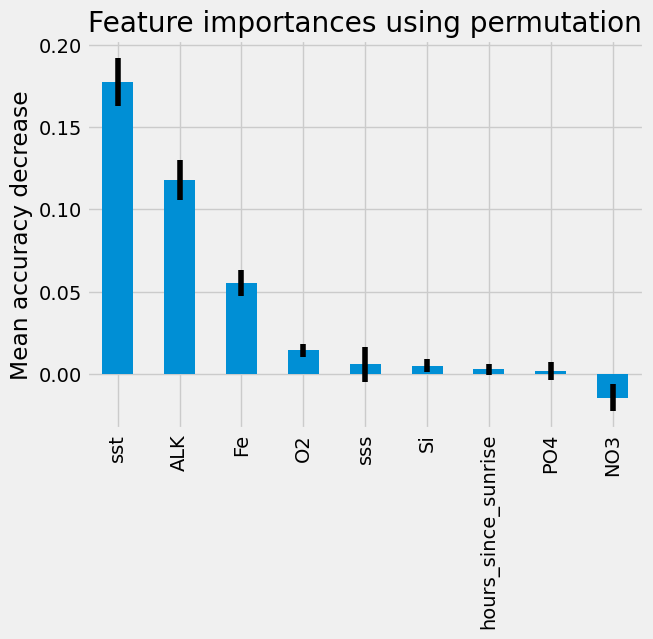

In [7]:
permutation_importances('syn', test_features, test_labels, feature_list_syn)

In [8]:
predictions, maes, rmses, old_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'syn')

In [9]:
drop = True
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, drop, ['NO3', 'PO4', 'hours_since_sunrise','Si'])
train_features, test_features, train_labels, test_labels = k_fold(features_syn, labels_syn, 8)
predict_cruise(hyperparameters, 'syn')

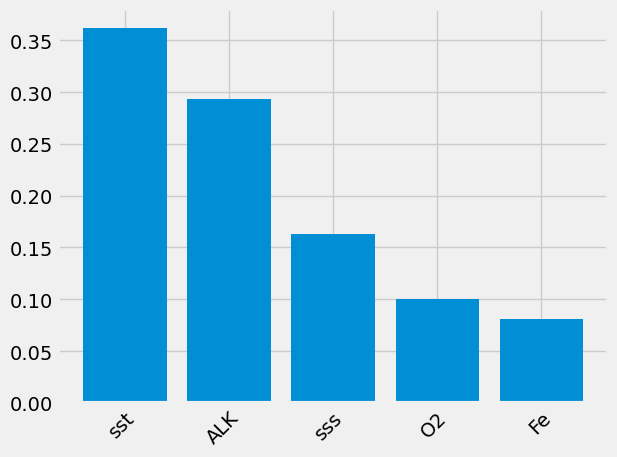

In [10]:
feature_importance('syn',feature_list_syn)

In [11]:
predictions, maes, rmses, more_nutrients_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'syn')

In [12]:
list_of_rmse = {'original': old_rmse}
list_of_rmse['max'] = more_nutrients_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['max'])/sorted_rmse['original'] * 100, '%' )

{'max': 0.8863698327645744, 'original': 0.9723019780726849}
the percent improvement is: 8.838009923465018 %


In [13]:
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, drop, ['hours_since_sunrise'])
train_features, test_features, train_labels, test_labels = k_fold(features_syn, labels_syn, 8)
predict_cruise(hyperparameters, 'syn')

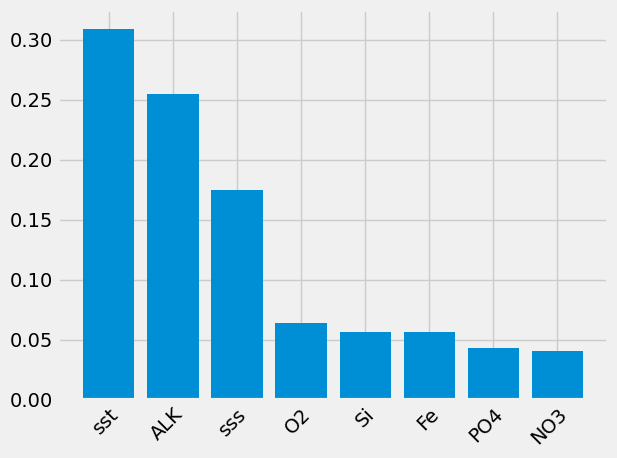

In [14]:
feature_importance('syn',feature_list_syn)

In [15]:
predictions, maes, rmses, sunrise_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'syn')

In [16]:
list_of_rmse['sunrise'] = sunrise_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['sunrise'])/sorted_rmse['original'] * 100, '%' )

{'max': 0.8863698327645744, 'sunrise': 0.965455069718683, 'original': 0.9723019780726849}
the percent improvement is: 0.7041956622955754 %


In [17]:
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, drop, ['hours_since_sunrise', 'sss', 'Si', 'PO4', 'NO3'])
train_features, test_features, train_labels, test_labels = k_fold(features_syn, labels_syn, 8)
predict_cruise(hyperparameters, 'syn')

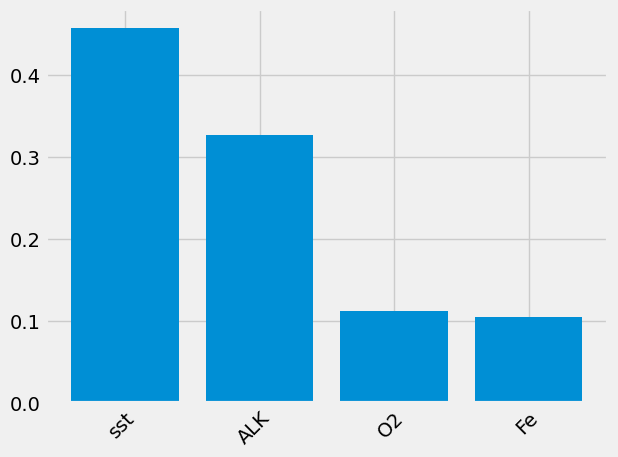

In [18]:
feature_importance('syn',feature_list_syn)

In [19]:
predictions, maes, rmses, perm_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'syn')

In [20]:
list_of_rmse['perm'] = perm_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['perm'])/sorted_rmse['original'] * 100, '%' )

{'perm': 0.8471569271298004, 'max': 0.8863698327645744, 'sunrise': 0.965455069718683, 'original': 0.9723019780726849}
the percent improvement is: 12.871006514966613 %


In [21]:
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, False, None)
train_features, test_features, train_labels, test_labels = k_fold(features_syn, labels_syn, 8)

In [22]:
hyperparameters={'n_estimators': 80, 'max_depth': 32, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'syn')

In [23]:
hyperparameters={'n_estimators': 120, 'max_depth': 12, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'syn')

In [24]:
hyperparameters={'n_estimators': 40, 'max_depth': 40, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'syn')

In [25]:
hyperparameters={'n_estimators': 60, 'max_depth': 24, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'syn')

In [26]:
drop = False
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, drop, None)
param_grid = {
        'n_estimators': [40, 60, 70, 80, 100],
        'max_depth': [12, 18, 24, 32],
        'max_features': ['sqrt']
    }

metrics = ['neg_root_mean_squared_error', 'r2']
# neg root mean squared error is the same as root mean squared error, but since the function chooses the best score we need to use the negative 

grid_search_hyperparams(param_grid, metrics, features_syn, labels_syn)

Fitting 8 folds for each of 20 candidates, totalling 160 fits
Best hyperparameters for  neg_root_mean_squared_error are: {'max_depth': 24, 'max_features': 'sqrt', 'n_estimators': 60}
Fitting 8 folds for each of 20 candidates, totalling 160 fits
Best hyperparameters for  r2 are: {'max_depth': 24, 'max_features': 'sqrt', 'n_estimators': 40}
